In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join

In [32]:
onlyfiles = sorted([f for f in listdir('results') if isfile(join('./results', f))])

In [33]:
onlyfiles

['NCA+PSO_10_100.csv',
 'NCA+PSO_10_200.csv',
 'NCA+PSO_10_300.csv',
 'NCA+PSO_10_400.csv']

In [6]:
csvs = []
for i, csv_name in enumerate(onlyfiles):
    aux_df = pd.read_csv(csv_name, index_col=0)
    aux_df['Iterações Realizadas'] = (i+1)*100
    csvs.append(aux_df)

In [12]:
df = pd.concat(csvs).reset_index(drop=True)
df['Iterações Realizadas'] = df['Iterações Realizadas'].map(lambda x: str(x))

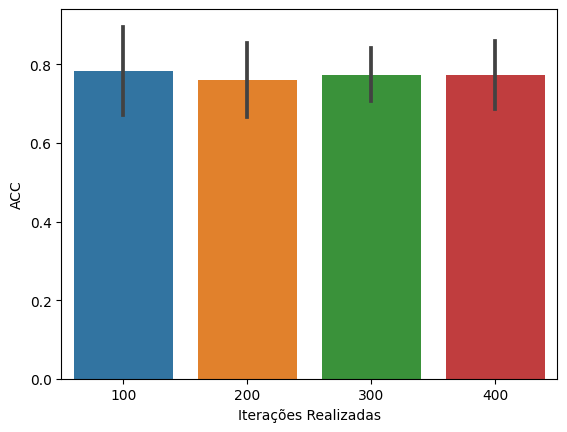

In [25]:
sns.barplot(data=df, x='Iterações Realizadas', y='ACC', errorbar='sd')
plt.savefig('graph/ACC_x_It.png')

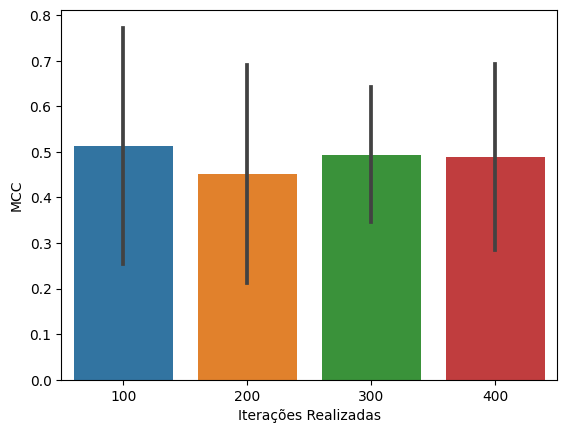

In [26]:
sns.barplot(data=df, x='Iterações Realizadas', y='MCC', errorbar='sd')
plt.savefig('graphs/MCC_x_It.png')

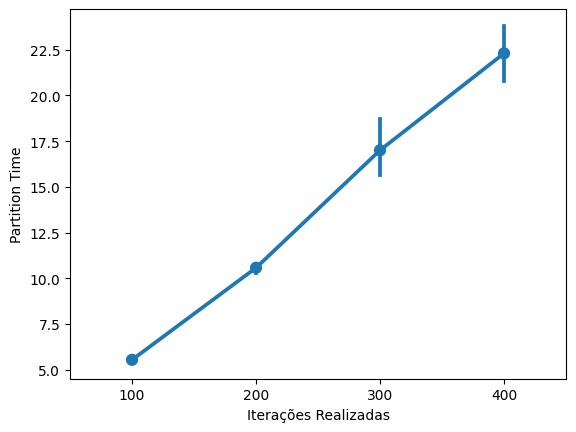

In [24]:
sns.pointplot(data=df, x='Iterações Realizadas', y='Partition Time')
plt.savefig('graphs/PartitionTime_x_It.png')